In [1]:
%matplotlib inline
import numpy as np 
import aplpy as ap 
import matplotlib as mpl 
from astropy import units as u
from astropy.io import fits
from matplotlib import pyplot as plt
from spectral_cube import SpectralCube as sc
import matplotlib.patheffects as path_effects
mpl.rc("font", family="serif", size=14)
mpl.rc("axes", linewidth = 1)
mpl.rc("lines", linewidth = 1)
mpl.rc("xtick.major", pad = 5, width = 1)
mpl.rc("ytick.major", pad = 5, width = 1)
mpl.rc("xtick.minor", width = 1)
mpl.rc("ytick.minor", width = 1)

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

In [2]:
hi_data = fits.open('G206.93-16.61E2_COc.fits') [0] # Open the FITS file for reading
cubeRaw = sc.read(hi_data,hdu=0)  # Initiate a SpectralCube
cube = cubeRaw.with_spectral_unit(u.km / u.s, velocity_convention='radio')
figout = 'CO(outflow)'

In [4]:
ra0, dec0 = 206.874676,-16.5550171
BMIN    =   8.764144090525E-05                                                       
BMAJ    =   1.005064960543E-04                                                  
BPA     =  -6.057054679328E+01 
cube = cubeRaw.with_spectral_unit(u.km / u.s,velocity_convention='radio')
vmin = 18
vmax = 30.7
rows = 2
cols = 6
dVel = 1.4
# dVel = (vmax-vmin)/rows/cols

/tmp/ipykernel_11111/225431138.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  levelMax = np.int(np.max(m0Max)/rms)
/tmp/ipykernel_11111/225431138.py:79: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(figout+'.pdf', bbox_inches='tight',


0.04714293


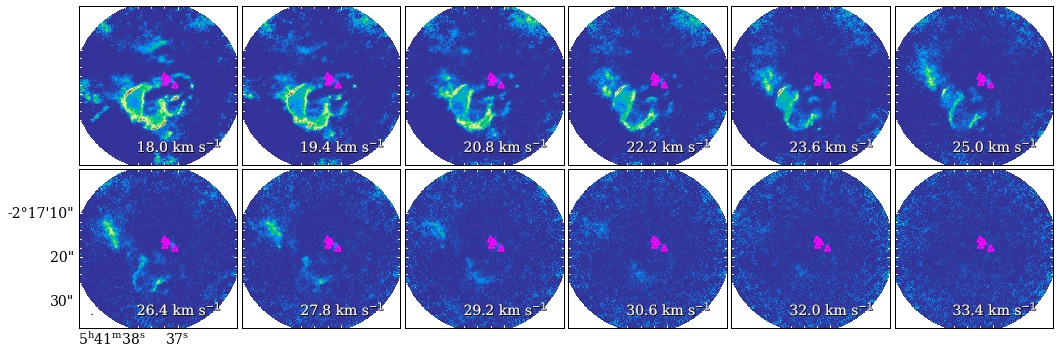

In [5]:
m0Max =[]
m0Min =[]
for iv in range(rows*cols):
    vlower = vmin+iv*dVel
    vupper = vmin+iv*dVel+dVel
    
    slab = cube.spectral_slab(vlower * u.km/u.s, 
        vupper * u.km/u.s)
    m0   = slab.moment0()
    validM0 = m0.value[np.where(m0.value == m0.value)]
    m0Min = m0Min+[validM0.min()]
    m0Max = m0Max+[validM0.max()]

# Determine the rms 
slab = cube.spectral_slab(vmin*u.km/u.s, (vmin+dVel)*u.km/u.s)
m0  = slab.moment0()
validM0 = m0.value[np.where(m0.value == m0.value)]
rms = validM0.std()
levelMax = np.int(np.max(m0Max)/rms)
levelStep = (levelMax-10)/15
# levels = np.linspace(5,levelMax,levelStep)*rms
levels = np.linspace(3,66,20)*rms

fig = plt.figure(1, figsize=(22, 22))
iv = 0
for i in range(rows):
    for j in range(cols):
        vlower = vmin+iv*dVel
        vupper = vmin+iv*dVel+dVel
        vcenter = np.mean([vlower,vupper])
        vLabel = '%.1f'%vlower+' km s$^{-1}}$'
        slab = cube.spectral_slab(vlower * u.km/u.s, 
                                  vupper * u.km/u.s)
        m0   = slab.moment0()
        subplot = [0.2+j*0.103,0.2+(rows-1-i)*0.103, 0.1, 0.1]
        fb = ap.FITSFigure(m0.hdu,figure = fig, 
                           subplot = subplot, aspect = 'auto')
        fb.recenter(85.4054,-2.288370, radius=0.005)
        fb.show_markers(85.40495833, -2.28815,marker='^',zorder=5,edgecolor='fuchsia',linewidth=2,s=30)
        fb.show_markers(85.40433333, -2.28833056,marker='^',zorder=5,edgecolor='fuchsia',linewidth=2,s=30)
        fb.show_markers(85.405, -2.28776944,marker='^',zorder=5,edgecolor='fuchsia',linewidth=2,s=30)
        fb.show_markers(85.40479167, -2.28792222,marker='^',zorder=5,edgecolor='fuchsia',linewidth=2,s=30)

        fb.show_colorscale(vmin=0, vmax = np.max(m0Max), cmap = 'terrain', 
                            stretch = 'linear')
        
        # fb.show_contour(m0.hdu, levels = levels, colors = 'blue', linewidth = 0.8)
        fb.add_label(0.9, 1-0.88, vLabel, relative = True,
                     horizontalalignment='right', 
                     path_effects = ([path_effects.PathPatchEffect(offset=(0.5, -0.5), 
                                                                       facecolor='white'),
                                          path_effects.PathPatchEffect(edgecolor='white', 
                                                                       linewidth=0.2,
                                                                       facecolor='white')]))
        fb.tick_labels.set_xformat('hh:mm:ss')
        # fb.tick_labels.set_yformat('dd:mm')
        # fb.ticks.set_xspacing(6*15/3600.0)
        # fb.ticks.set_xspacing(2.0/60.0)
        # fb.ticks.set_color('k')
#         ap.hide_tick_labels()
        fb.axis_labels.hide()
        fb.tick_labels.hide()
#         fb.ap.hide_x()
#         fb.ap.hide_y()
        if j == 0 and i == rows - 1:
            # fb.show_axis_labels()
            # fb.show_tick_labels()
            # fb.axis_labels.show()
            fb.tick_labels.show()
            fb.add_beam(major = BMAJ, minor = BMIN, angle = BPA,
                       fc = 'blue')
        iv = iv + 1
# fb.add_colorbar(box = [0.2,0.2+(rows)*0.103, 0.203, 0.01], 
                # ticks = [5,10,15,20], 
                # box_orientation = "horizontal", location = 'top', 
                # axis_label_text = "K km s$^{-1}$")


plt.savefig(figout+'.pdf', bbox_inches='tight',
            papertype='a2')
# plt.savefig(figout+'.pdf', bbox_inches='tight',
#             papertype='a2')
# plt.savefig(figout+'.png', bbox_inches='tight',
#             papertype='a2')
print(rms)

In [8]:
ra0, dec0 = 206.874676,-16.5550171
BMIN    =   8.764144090525E-05                                                       
BMAJ    =   1.005064960543E-04                                                  
BPA     =  -6.057054679328E+01 
cube = cubeRaw.with_spectral_unit(u.km / u.s,velocity_convention='radio')
vmin = -21.2+1.4
vmax = 4
rows = 3
cols = 6
dVel = 1.4

/tmp/ipykernel_11111/2824399537.py:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  levelMax = np.int(np.max(m0Max)/rms)
/tmp/ipykernel_11111/2824399537.py:81: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "papertype" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig(figout+'.pdf', bbox_inches='tight',


0.018653074


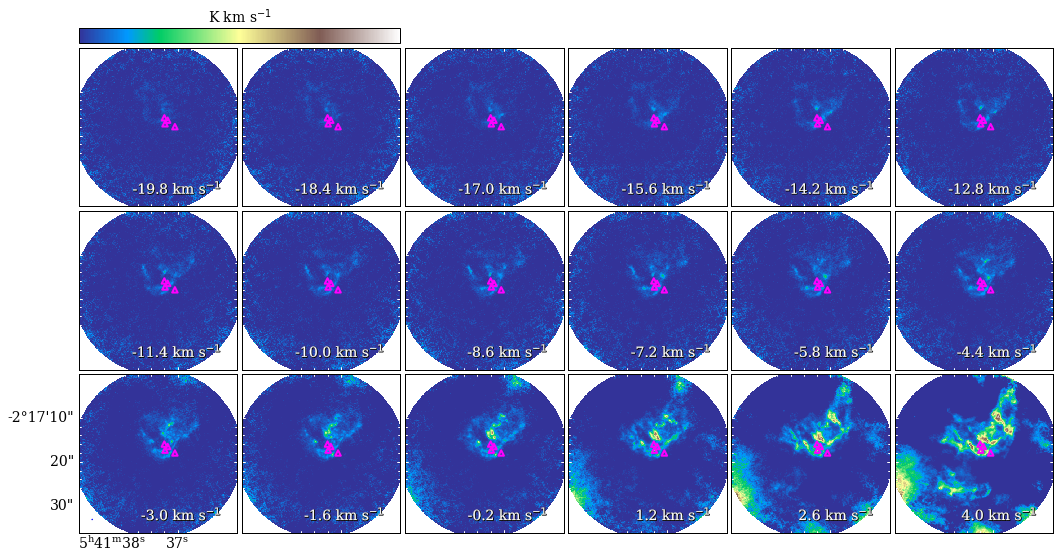

In [10]:
m0Max =[]
m0Min =[]
for iv in range(rows*cols):
    vlower = vmin+iv*dVel
    vupper = vmin+iv*dVel+dVel
    
    slab = cube.spectral_slab(vlower * u.km/u.s, 
        vupper * u.km/u.s)
    m0   = slab.moment0()
    validM0 = m0.value[np.where(m0.value == m0.value)]
    m0Min = m0Min+[validM0.min()]
    m0Max = m0Max+[validM0.max()]

# Determine the rms 
slab = cube.spectral_slab(vmin*u.km/u.s, (vmin+dVel)*u.km/u.s)
m0  = slab.moment0()
validM0 = m0.value[np.where(m0.value == m0.value)]
rms = validM0.std()
levelMax = np.int(np.max(m0Max)/rms)
levelStep = (levelMax-10)/15
# levels = np.linspace(5,levelMax,levelStep)*rms
levels = np.linspace(3,66,20)*rms

fig = plt.figure(1, figsize=(22, 22))
iv = 0
for i in range(rows):
    for j in range(cols):
        vlower = vmin+iv*dVel
        vupper = vmin+iv*dVel+dVel
        vcenter = np.mean([vlower,vupper])
        vLabel = '%.1f'%vlower+' km s$^{-1}}$'
        slab = cube.spectral_slab(vlower * u.km/u.s, 
                                  vupper * u.km/u.s)
        m0   = slab.moment0()
        subplot = [0.2+j*0.103,0.2+(rows-1-i)*0.103, 0.1, 0.1]
        fb = ap.FITSFigure(m0.hdu,figure = fig, 
                           subplot = subplot, aspect = 'auto')
        fb.recenter(85.4054,-2.288370, radius=0.005)
        fb.show_markers(85.40495833, -2.28815,marker='^',zorder=5,edgecolor='fuchsia',linewidth=2,s=30)
        fb.show_markers(85.40433333, -2.28833056,marker='^',zorder=5,edgecolor='fuchsia',linewidth=2,s=30)
        fb.show_markers(85.405, -2.28776944,marker='^',zorder=5,edgecolor='fuchsia',linewidth=2,s=30)
        fb.show_markers(85.40479167, -2.28792222,marker='^',zorder=5,edgecolor='fuchsia',linewidth=2,s=30)

        fb.show_colorscale(vmin=0, vmax = np.max(m0Max)*0.9, cmap = 'terrain', 
                            stretch = 'linear')
        
        # fb.show_contour(m0.hdu, levels = levels, colors = 'white', linewidth = 0.8)
        fb.add_label(0.9, 1-0.88, vLabel, relative = True,
                     horizontalalignment='right', 
                     path_effects = ([path_effects.PathPatchEffect(offset=(0.5, -0.5), 
                                                                       facecolor='white'),
                                          path_effects.PathPatchEffect(edgecolor='white', 
                                                                       linewidth=0.2,
                                                                       facecolor='white')]))
        fb.tick_labels.set_xformat('hh:mm:ss')
        # fb.tick_labels.set_yformat('dd:mm')
        # fb.ticks.set_xspacing(6*15/3600.0)
        # fb.ticks.set_xspacing(2.0/60.0)
        fb.ticks.set_color('white')
#         ap.hide_tick_labels()
        fb.axis_labels.hide()
        fb.tick_labels.hide()
#         fb.ap.hide_x()
#         fb.ap.hide_y()
        if j == 0 and i == rows - 1:
            # fb.show_axis_labels()
            # fb.show_tick_labels()
            # fb.axis_labels.show()
            fb.tick_labels.show()
            fb.ticks.set_color('white')
            fb.axis_labels.set_xtext(' ')
            fb.add_beam(major = BMAJ, minor = BMIN, angle = BPA,
                       fc = 'blue')
        iv = iv + 1
fb.add_colorbar(box = [0.2,0.2+(rows)*0.103, 0.203, 0.01], 
                ticks = [5,10,15,20], 
                box_orientation = "horizontal", location = 'top', 
                axis_label_text = "K km s$^{-1}$")


plt.savefig(figout+'.pdf', bbox_inches='tight',
            papertype='a2')
# plt.savefig(figout+'.pdf', bbox_inches='tight',
#             papertype='a2')
# plt.savefig(figout+'.png', bbox_inches='tight',
#             papertype='a2')
print(rms) 

In [45]:
import aplpy
import pylab as pl
import regions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import astropy.units as u
from astropy.utils.data import download_file
from astropy.io import fits  
from astropy.utils import data
from spectral_cube import SpectralCube
from astroquery.esasky import ESASky
from astroquery.utils import TableList
from astropy.wcs import WCS
from astropy import wcs
from reproject import reproject_interp
from spectral_cube import SpectralCube as sc

Error initializing plugin EntryPoint(name='Windows (alt)', value='keyrings.alt.Windows', group='keyring.backends').
Traceback (most recent call last):
  File "/home/max/.local/lib/python3.6/site-packages/keyring/backend.py", line 202, in _load_plugins
    init_func = ep.load()
  File "/home/max/.local/lib/python3.6/site-packages/importlib_metadata/__init__.py", line 167, in load
    module = import_module(match.group('module'))
  File "/usr/lib/python3.6/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
  File "<frozen importlib._bootstrap>", line 994, in _gcd_import
  File "<frozen importlib._bootstrap>", line 971, in _find_and_load
  File "<frozen importlib._bootstrap>", line 955, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 665, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_rem

In [37]:
hi_data = fits.open('G206.93-16.61E2_C18O.fits') [0] # Open the FITS file for reading
cube = sc.read(hi_data,hdu=0)
cube = cube.with_spectral_unit(u.km / u.s, velocity_convention='radio')

Text(0, 0.5, 'Jy/beam')

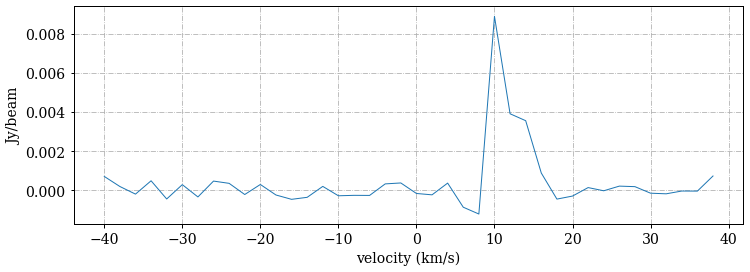

In [38]:
ds9_str='fk5; circle(5:41:37.131 ,-2:17:16.773,4")'
subcube=cube.subcube_from_ds9region(ds9_str)
spectrum=subcube.mean(axis=(1,2))
# plt.plot(spectrum)

vsp = cube.spectral_axis

plt.figure(figsize=(12,4))
plt.plot(vsp,spectrum)
plt.grid(linestyle='-.')
plt.xlabel('velocity (km/s)',fontsize=14)
# plt.title(r'$HCN$')
plt.ylabel('Jy/beam',fontsize=14)

In [37]:
# cube = cube.with_spectral_unit(u.km / u.s, velocity_convention='radio')
_Tb_m = np.nan_to_num(cube.hdu.data)
# ---------------reduce continuum dimension-----------------
cont_data = np.squeeze(hi_data.data)
cont_data = np.nan_to_num(cont_data)
_data1 = np.squeeze(hi_data.data)
_data1 = np.nan_to_num(_data1)
_w1 = wcs.WCS(hi_data, naxis=2)
hi_data_cont2 = fits.ImageHDU(data=_data1, header=_w1.to_header())
# ------------------------ reduce the noise data for moment maps -----------------------
_data = np.nan_to_num(cube.hdu.data)
_w = wcs.WCS(cube.hdu.header)
rms = np.std(_data[5,:,:])
idm = np.where(_data < rms*5) # bellow the noise level is set to zero.
_data[idm] = 0
sub_cube = sc(data=_data, wcs=_w)
sub_cube= sub_cube.with_spectral_unit(u.km / u.s)
print(rms)
hdu_in = hi_data_cont2
scu_in = sub_cube

0.005739279


In [39]:
#velocity_1
sub_cube_slab = sub_cube.spectral_slab(8 *u.km / u.s, 10 *u.km / u.s)
moment_0 = sub_cube_slab.with_spectral_unit(u.km/u.s).moment(order=0)
moment_0.write('C18O_1.fits')  
print(sub_cube_slab)

SpectralCube with shape=(2, 1000, 1000):
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:    85.397135 deg:   85.413798 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    -2.296704 deg:   -2.280054 deg
 n_s:      2  type_s: VRAD      unit_s: km / s  range:        8.000 km / s:      10.000 km / s


In [23]:
#velocity_2
sub_cube_slab = sub_cube.spectral_slab(10 *u.km / u.s, 20 *u.km / u.s)
moment_0 = sub_cube_slab.with_spectral_unit(u.km/u.s).moment(order=0)
moment_0.write('C18O_2.fits')  
print(sub_cube_slab)

SpectralCube with shape=(6, 1000, 1000):
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:    85.397135 deg:   85.413798 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    -2.296704 deg:   -2.280054 deg
 n_s:      6  type_s: VRAD      unit_s: km / s  range:       10.000 km / s:      20.000 km / s


INFO: Auto-setting vmin to -1.204e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.571e-03 [aplpy.core]


/home/max/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = super().contour(*args, **kwargs)
/home/max/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = super().contour(*args, **kwargs)
/home/max/anaconda3/lib/python3.7/site-packages/aplpy/overlays.py:258: UserWarning: Text labels do not have attribute cornor. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/home/max/anaconda3/lib/python3.7/site-packages/aplpy/overlays.py:274: UserWarning: Scalebar does not have attribute cornor. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


INFO: Auto-setting resolution to 35.9865 dpi [aplpy.core]


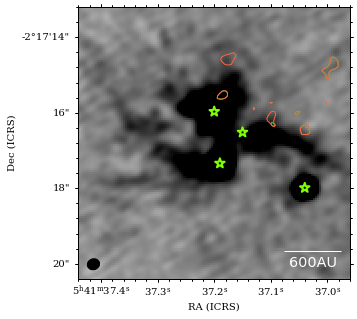

In [42]:
import aplpy
rms=0.0057

f=aplpy.FITSFigure('TM1+TM2+ACA_contour.fits',figsize=(8, 5))
# f.recenter(330.2941,-0.3945,radius=0.008)
f.recenter(85.405,-2.288, radius=0.001)
f.show_colorscale(cmap='gray_r')


f.show_contour('C18O_1.fits',colors='limegreen',smooth=True,levels=[10*rms,20*rms,30*rms,35*rms,40*rms,50*rms],linewidth=0.1)
f.show_contour('C18O_2.fits',colors='tomato',smooth=True,levels=[10*rms,20*rms,30*rms,35*rms,40*rms,50*rms],linewidth=0.1)

f.show_markers(85.40495833, -2.28815,marker='*',zorder=5,edgecolor='chartreuse',linewidth=2,s=100)
f.show_markers(85.40433333, -2.28833056,marker='*',zorder=5,edgecolor='chartreuse',linewidth=2,s=100)
f.show_markers(85.405, -2.28776944,marker='*',zorder=5,edgecolor='chartreuse',linewidth=2,s=100)
f.show_markers(85.40479167, -2.28792222,marker='*',zorder=5,edgecolor='chartreuse',linewidth=2,s=100)
# f.add_colorbar()
# f.colorbar.set_axis_label_text('[Jy km / (beam s)]')
f.add_beam()
f.beam.set_color('black')
f.beam.set_hatch('+')
f.add_scalebar(0.00042,color='white',cornor='bottom')
f.scalebar.set_font(size='x-large',family='sans-serif')
f.scalebar.set_label('600AU')
f.savefig('G206.93-16.61E2_C18O_disk.png')
f.savefig('G206.93-16.61E2_C18O_disk.eps')


In [26]:
hi_data = fits.open('G206.93-16.61E2_H2COl.fits') [0] # Open the FITS file for reading
cube = sc.read(hi_data,hdu=0)
cube = cube.with_spectral_unit(u.km / u.s, velocity_convention='radio')

Text(0, 0.5, 'Jy/beam')

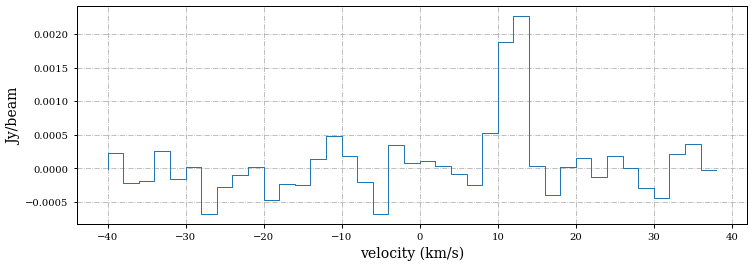

In [28]:
ds9_str='fk5; circle(5:41:37.131 ,-2:17:16.773,4")'
subcube=cube.subcube_from_ds9region(ds9_str)
spectrum=subcube.mean(axis=(1,2))
# plt.plot(spectrum)

vsp = cube.spectral_axis

plt.figure(figsize=(12,4))
plt.step(vsp,spectrum)
plt.grid(linestyle='-.')
plt.xlabel('velocity (km/s)',fontsize=14)
# plt.title(r'$HCN$')
plt.ylabel('Jy/beam',fontsize=14)

In [29]:
# cube = cube.with_spectral_unit(u.km / u.s, velocity_convention='radio')
_Tb_m = np.nan_to_num(cube.hdu.data)
# ---------------reduce continuum dimension-----------------
cont_data = np.squeeze(hi_data.data)
cont_data = np.nan_to_num(cont_data)
_data1 = np.squeeze(hi_data.data)
_data1 = np.nan_to_num(_data1)
_w1 = wcs.WCS(hi_data, naxis=2)
hi_data_cont2 = fits.ImageHDU(data=_data1, header=_w1.to_header())
# ------------------------ reduce the noise data for moment maps -----------------------
_data = np.nan_to_num(cube.hdu.data)
_w = wcs.WCS(cube.hdu.header)
rms = np.std(_data[5,:,:])
idm = np.where(_data < rms*5) # bellow the noise level is set to zero.
_data[idm] = 0
sub_cube = sc(data=_data, wcs=_w)
sub_cube= sub_cube.with_spectral_unit(u.km / u.s)
print(rms)
hdu_in = hi_data_cont2
scu_in = sub_cube

0.0033923737


In [32]:
#velocity_1
sub_cube_slab = sub_cube.spectral_slab(6 *u.km / u.s, 12 *u.km / u.s)
moment_0 = sub_cube_slab.with_spectral_unit(u.km/u.s).moment(order=0)
moment_0.write('H2CO_1.fits')  
print(sub_cube_slab)

SpectralCube with shape=(4, 1000, 1000):
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:    85.397135 deg:   85.413798 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    -2.296704 deg:   -2.280054 deg
 n_s:      4  type_s: VRAD      unit_s: km / s  range:        6.000 km / s:      12.000 km / s


In [33]:
#velocity_1
sub_cube_slab = sub_cube.spectral_slab(12 *u.km / u.s, 20 *u.km / u.s)
moment_0 = sub_cube_slab.with_spectral_unit(u.km/u.s).moment(order=0)
moment_0.write('H2CO_2.fits')  
print(sub_cube_slab)

SpectralCube with shape=(5, 1000, 1000):
 n_x:   1000  type_x: RA---SIN  unit_x: deg    range:    85.397135 deg:   85.413798 deg
 n_y:   1000  type_y: DEC--SIN  unit_y: deg    range:    -2.296704 deg:   -2.280054 deg
 n_s:      5  type_s: VRAD      unit_s: km / s  range:       12.000 km / s:      20.000 km / s


INFO: Auto-setting vmin to -1.154e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.476e-03 [aplpy.core]


/home/max/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = super().contour(*args, **kwargs)
/home/max/anaconda3/lib/python3.7/site-packages/astropy/visualization/wcsaxes/core.py:234: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = super().contour(*args, **kwargs)
/home/max/anaconda3/lib/python3.7/site-packages/aplpy/overlays.py:258: UserWarning: Text labels do not have attribute cornor. Skipping.
  warnings.warn("Text labels do not have attribute {0}. Skipping.".format(kwarg))
/home/max/anaconda3/lib/python3.7/site-packages/aplpy/overlays.py:274: UserWarning: Scalebar does not have attribute cornor. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


INFO: Auto-setting resolution to 35.9865 dpi [aplpy.core]


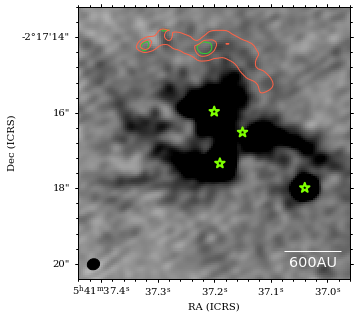

In [41]:
import aplpy
rms=0.0033

f=aplpy.FITSFigure('TM1+TM2+ACA_contour.fits',figsize=(8, 5))
# f.recenter(330.2941,-0.3945,radius=0.008)
f.recenter(85.405,-2.288, radius=0.001)
f.show_colorscale(cmap='gray_r')


f.show_contour('H2CO_1.fits',colors='limegreen',smooth=True,levels=[10*rms,20*rms,30*rms,35*rms,40*rms,50*rms],linewidth=0.1)
f.show_contour('H2CO_2.fits',colors='tomato',smooth=True,levels=[10*rms,20*rms,30*rms,35*rms,40*rms,50*rms],linewidth=0.1)

f.show_markers(85.40495833, -2.28815,marker='*',zorder=5,edgecolor='chartreuse',linewidth=2,s=100)
f.show_markers(85.40433333, -2.28833056,marker='*',zorder=5,edgecolor='chartreuse',linewidth=2,s=100)
f.show_markers(85.405, -2.28776944,marker='*',zorder=5,edgecolor='chartreuse',linewidth=2,s=100)
f.show_markers(85.40479167, -2.28792222,marker='*',zorder=5,edgecolor='chartreuse',linewidth=2,s=100)
# f.add_colorbar()
# f.colorbar.set_axis_label_text('[Jy km / (beam s)]')
f.add_beam()
f.beam.set_color('black')
f.beam.set_hatch('+')
f.add_scalebar(0.00042,color='white',cornor='bottom')
f.scalebar.set_font(size='x-large',family='sans-serif')
f.scalebar.set_label('600AU')
f.savefig('G206.93-16.61E2_H2CO_disk.png')
f.savefig('G206.93-16.61E2_H2CO_disk.eps')
